## CHSH-Ungleichung in Abhängigkeit vom Winkel

Der Beispiel-Code ist adaptiert 

In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, execute, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram

#import python stuff
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make_circuit(theta0, theta1):
    qc = QuantumCircuit(2,2)

    qc.h(0)
    qc.cx(0, 1)

    if theta0 != 0 :
        qc.ry(2*theta0, 0)

    if theta1 != 0 :
        qc.ry(2*theta1, 1)

    qc.measure(range(2),range(2))
    
    return qc

In [3]:
def make_circuits(theta_sequenz):
    circuits = []
    
    for theta in theta_sequenz:
        circuits.append( make_circuit(0, theta) )
        circuits.append( make_circuit(0, -theta) )
        circuits.append( make_circuit(2*theta, theta) )
        circuits.append( make_circuit(2*theta, -theta) )
        
    return circuits

In [4]:
def Cor(counts, shots):
    result = 0;
    
    if '00' in counts:
        result += counts['00']
    if '01' in counts:
        result -= counts['01']
    if '10' in counts:
        result -= counts['10']
    if '11' in counts:
        result += counts['11']

    return result/shots

In [5]:
number_of_thetas = 32
theta_sequence = np.linspace(0,np.pi/2,number_of_thetas)
my_circuits = make_circuits(theta_sequence)

In [6]:
shots = 5000

backend = Aer.get_backend('qasm_simulator')

In [7]:
theta_vec = []
cor_vec = []

for i in range( int(number_of_thetas) ):
    job1 = execute(my_circuits[4*i], backend, shots=shots)
    result1 = job1.result()
    counts1 = result1.get_counts(my_circuits[4*i])
    E1 = Cor(counts1, shots)
    
    job2 = execute(my_circuits[4*i+1], backend, shots=shots)
    result2 = job2.result()
    counts2 = result2.get_counts(my_circuits[4*i+1])
    E2 = Cor(counts2, shots)
    
    job3 = execute(my_circuits[4*i+2], backend, shots=shots)
    result3 = job3.result()
    counts3 = result3.get_counts(my_circuits[4*i+2])
    E3 = Cor(counts3, shots)
    
    job4 = execute(my_circuits[4*i+3], backend, shots=shots)
    result4 = job4.result()
    counts4 = result4.get_counts(my_circuits[4*i+3])
    E4 = Cor(counts4, shots)
    
    E = E1 + E2 + E3 - E4
    
    theta_vec.append( theta_sequence[i]*360/(2*np.pi) )
    cor_vec.append(E)
    # print("Correlation {:>3f}".format(E) )
    # print("Theta Value {:>3f} Grad: {:>3f}".format( theta_sequence[i],  theta_sequence[i]*360/(2*np.pi)) )
    # print("")

Text(0.5, 0, 'Theta (degree)')

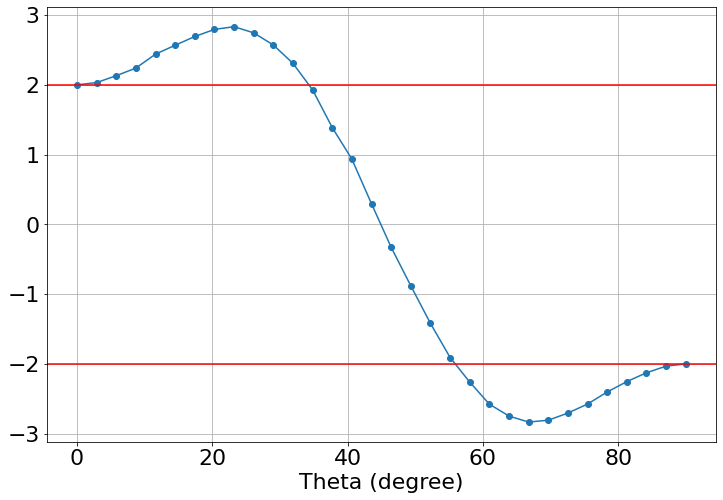

In [8]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 22})
plt.plot(theta_vec,cor_vec,'o-',label = 'Bell Curve')
plt.grid(which='major',axis='both')
plt.rcParams.update({'font.size': 16})
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=-2, color='r', linestyle='-')
plt.xlabel('Theta (degree)')